# **11.The Bootstrap**

## 11.1 What is Bootstrapping?

In statistics, Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a population parameter.

This basically means that bootstrap sampling is a technique using which you can estimate parameters like mean for an entire population without explicitly considering each and every data point in the population.

Instead of looking at the entire population, we look at multiple subsets all of the same size taken from the population.

For example, if your population size is 1000. Then to find the mean, instead of considering all the 1000 entries you can take 50 samples of size 4 each and calculate the mean for each sample. This way you will be taking an average of 200 entries (50X4) chosen randomly.



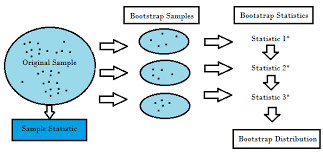

## 11.2 Replacement & Sampling

In order to better understand bootstrapping, it is helpful to understand what’s meant by replacement and the impact that replacement has on probability. Replacement means that every time an item is drawn from the pool, that same item remains a part of the sample pool that will be drawn from in the next instance. This rule continues to apply for all subsequent samples. If you were to have completely removed the first sample from the sampling pool without placing it back in and then drew the second sample, the items drawn in that sample would not be as likely to occur as the items in the first sample because the overall population would now be smaller. By removing data with each random sampling, the population measured in subsequent samples would continue to shrink. 

A relatable example of how sampling with and without replacement works is the game of drawing names out of a hat for raffle prizes. If the person pulling out the names uses replacement by putting a winner’s name back in the hat before drawing names for the next prize, although it is highly unlikely, replacement can allow that same person to win all of the prizes. 

##11.3 Practically Implementing Bootstrap Sampling in Python

Now let us try & implement the bootstrapping technique.

The data set can be found [here.](https://drive.google.com/file/d/1JfZw9AaOQv4uCA_Cq-6Bqzju9sIRVScd/view?usp=sharing)

We will be doing bootstrap sampling on a specific data set and will compute the range to check the model performance on unseen data or the production data. We will first define the libraries and then will load the data. 

Use the below code for the same. 

In [ ]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np
import pandas as pd
data = pd.read_csv('/content/Iris.csv')
print(data) 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now we will define the data points values, n_iterations we want, and the number of sizes of each data set. Then we will create a new data set using bootstrap sampling. We are using the RandomForest classifier for this model. All the predictions made by the model are evaluated using accuracy scores that are kept in scores variable. 

Refer to the below code for the same. 

In [ ]:
values = data.values
n_iterations = 10
n_size = int(len(data) * 1)
scores = list()
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfcl = RandomForestClassifier()
    rfcl.fit(train[:,:-1], train[:,-1])
    predictions = rfcl.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)   
    print(score)
    scores.append(score)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Since we got all scores now we will check the range of the accuracy using histogram visualization. We will be using 95% confidence and will be checking the accuracy. 

Use the below code to the same. 

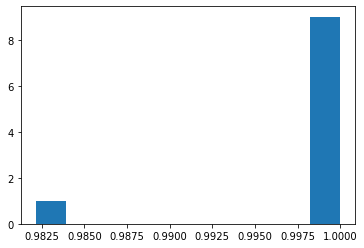

95.0 confidence interval 98.6% and 100.0%


In [ ]:
pyplot.hist(scores)
pyplot.show()
alpha = 0.95                         
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

We explored model performance technique i.e Bootstrap Sampling. We first discussed what it is and how it works. We then implemented the same on the iris data set and generated different data sets, built a random forest model over it, and computed different accuracy scores. Their scores were then used to check the range of accuracy by confidence level of 95%. 

## 11.4 Advantages and Disadvantages of Bootstrapping

Here are some things to consider when deciding whether to use bootstrapping in machine learning:

**Advantages**

1. Does not require a large sample size. It can be used on small datasets.
2. Handles outliers well. 

**Disadvantages**

1. Can require a long amount of computation time.
2. Results it provides cannot be understood to be correct with 100% certainty. There will be a margin of error.
3. Can fail when distributions are not finite.

## 11.5 Exercise- Implementing Bootstrap Sampling in Python

Now let’s look at how to implement bootstrap sampling in python. This is an exercise with a set of instructions to be followed to implement bootstrap sampling in python.

You will generate some random data with a predetermined mean. To do that you are going to use the NumPy module in Python.

Let’s start by importing the necessary modules.

### **Step 1: Importing the Necessary Modules**

The modules we need are :

Numpy

Random

To import these modules, use :

In [ ]:
#Import the libraries

import numpy as np
import random

### **Step 2: Generating Random Data**

Now generate a normal distribution with a mean of 300 and with 1000 entries.

The code for that is to be written below:

In [ ]:
#Write your code here

x = np.random.normal(loc= 300.0, size=1000)

Now calculate the mean of this data & print it :

In [ ]:
#Wtite your code here

print (np.mean(x))

299.94884244590065


### **Step 3: Using Bootsrap Sampling to Estimate the Mean**

Now create 50 samples of size 4 each to estimate the mean.

**Note:** The list **sample_mean** will contain the mean for all the 50 samples. 

In [ ]:
#Write your code here using a for loop

sample_mean = []
 
for i in range(50):
  y = random.sample(x.tolist(), 4)
  avg = np.mean(y)
  sample_mean.append(avg)

For estimating the mean of the population calculate the mean for sample_mean.

In [ ]:
#Calculate the mean of sample_mean

print(np.mean(sample_mean))

299.9162998748671


Congratulations on completing this exercise!

One thing that you'll notice is if we run the code in this section again then we will get a different output. This is because each time we run the code, we will generate new samples. However, each time the output will be close to the actual mean (300).


##11.6 Dataset Based Exercises

###**Exercise 1**

Here we'll be working on the Seeds Dataset which can be found [here.](https://drive.google.com/file/d/1O_leKExsPfIqjmbuQybcC0Cp9jx96qTM/view?usp=sharing)

We will be doing bootstrap sampling & will compute the range to check the model performance on unseen data or the production data. First define the libraries and then load the data. 

In [ ]:
#Write your code here

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np
import pandas as pd
data2 = pd.read_csv('/content/seeds.csv')
print(data2) 

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.825     1  
3              2.25

Now define the data points values, n_iterations we want, and the number of sizes of each data set. Then create a new data set using bootstrap sampling. Use the RandomForest classifier for this model. All the predictions made by the model are evaluated using accuracy scores that are kept in scores variable. 

In [ ]:
values = data.values
n_iterations = 10
n_size = int(len(data) * 1)
scores = list()
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfcl = RandomForestClassifier()
    rfcl.fit(train[:,:-1], train[:,-1])
    predictions = rfcl.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)   
    print(score)
    scores.append(score)

1.0
0.9833333333333333
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Since we got all scores now check the range of the accuracy using histogram visualization. Use 95% confidence check the accuracy. 

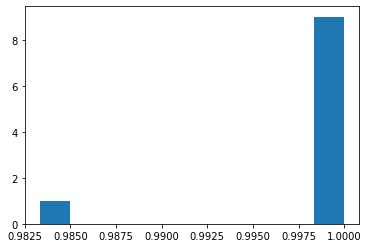

95.0 confidence interval 98.7% and 100.0%


In [ ]:
pyplot.hist(scores)
pyplot.show()
alpha = 0.95                         
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

###**Exercise 2**

The link for the Wine Quality dataset can be found [here.](https://drive.google.com/file/d/1Pg1HHPvWV3923P_fKRPLyD6tQBB4MMQy/view?usp=sharing)

Perform the same thing as the above exercise with this dataset. 

We will be doing bootstrap sampling & will compute the range to check the model performance on unseen data or the production data. First define the libraries and then load the data. 

In [ ]:
#Write your code here

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np
import pandas as pd
data3 = pd.read_csv('/content/winequality-red.csv')
print(data3) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Now define the data points values, n_iterations we want, and the number of sizes of each data set. Then create a new data set using bootstrap sampling. Use the RandomForest classifier for this model. All the predictions made by the model are evaluated using accuracy scores that are kept in scores variable.

In [ ]:
#Write your code here

values = data.values
n_iterations = 10
n_size = int(len(data) * 1)
scores = list()
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfcl = RandomForestClassifier()
    rfcl.fit(train[:,:-1], train[:,-1])
    predictions = rfcl.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)   
    print(score)
    scores.append(score)

1.0
1.0
1.0
1.0
1.0
0.9830508474576272
0.9827586206896551
1.0
1.0
1.0


Since we got all scores now check the range of the accuracy using histogram visualization. Use 95% confidence check the accuracy. 

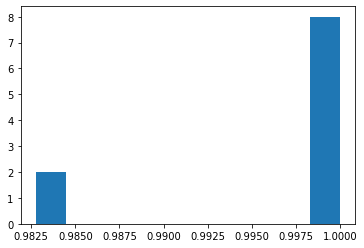

95.0 confidence interval 98.3% and 100.0%


In [ ]:
#Write your code here

pyplot.hist(scores)
pyplot.show()
alpha = 0.95                         
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))